In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Azif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Azif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Azif\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Read the CSV file
df = pd.read_csv('restaurant_reviews.csv')

In [5]:
df.head()

,Review,Sentiment,Category,Topics
0,I love the cozy atmosphere of this place. The ...,Positive,Dining Experience,"atmosphere, pizza, staff"
1,The sushi at this place was terrible. It was b...,Negative,Food,sushi
2,I love the cozy atmosphere of this place. The ...,Positive,Dining Experience,"atmosphere, pasta, staff"
3,The salad at this place was decent. Nothing ex...,Neutral,Food,salad
4,This hotel was alright. The sushi was nothing ...,Neutral,Dining Experience,sushi


In [7]:
# Initialize stemming and lemmatization objects
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_review(review):
    
    # Convert to lowercase
    review = review.lower()
    
    # Remove punctuations
    review = re.sub(r'[^\w\s]', '', review)
   
    # Remove numbers
    review = re.sub(r'\d+', '', review)
    
    # Tokenize words
    tokens = word_tokenize(review)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Perform stemming and lemmatization
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens into a single string
    preprocessed_review = ' '.join(lemmatized_tokens)
    return preprocessed_review

# Preprocess the reviews
df['preprocessed_text'] = df['Review'].apply(preprocess_review)

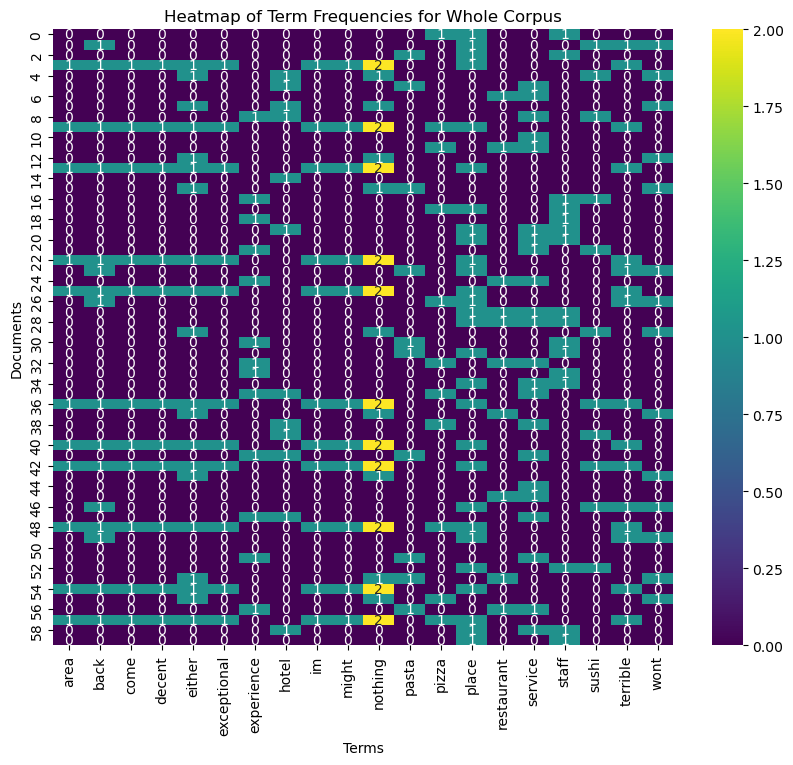

In [9]:
vectorizer = CountVectorizer(max_features=20)
X = vectorizer.fit_transform(df['preprocessed_text'])
term_freq_matrix = X.toarray()
terms = vectorizer.get_feature_names_out()

# Create Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(term_freq_matrix, xticklabels=terms, cmap='viridis', annot=True)
plt.title("Heatmap of Term Frequencies for Whole Corpus")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

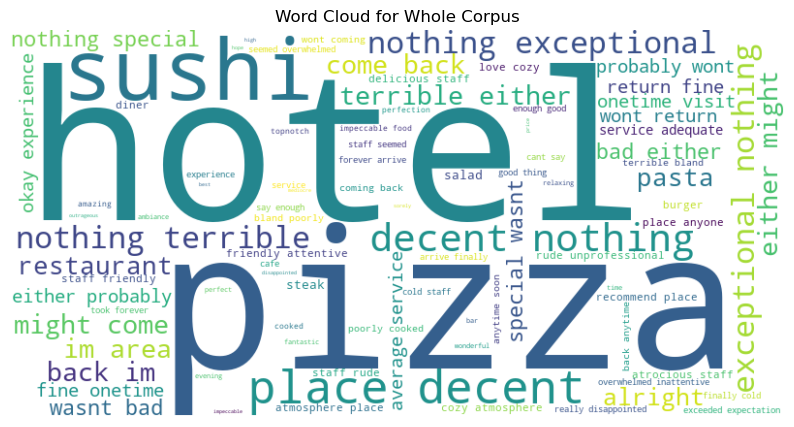

In [11]:
all_text = " ".join(df['preprocessed_text'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Whole Corpus")
plt.show()

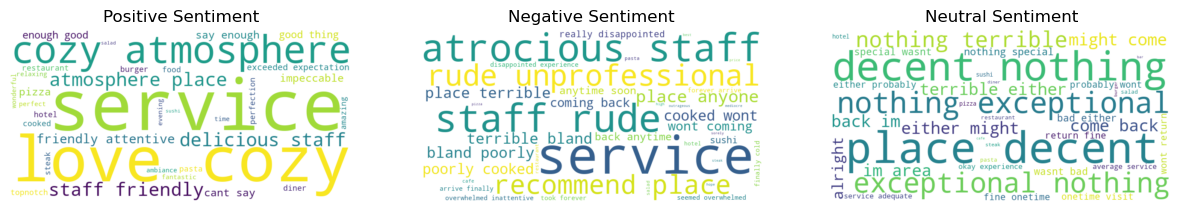

In [13]:
# Generate word cloud for positive sentiment
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['preprocessed_text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate word cloud for negative sentiment
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['preprocessed_text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Generate word cloud for neutral sentiment
neutral_text = ' '.join(df[df['Sentiment'] == 'Neutral']['preprocessed_text'])
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Display the word clouds
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

plt.show()

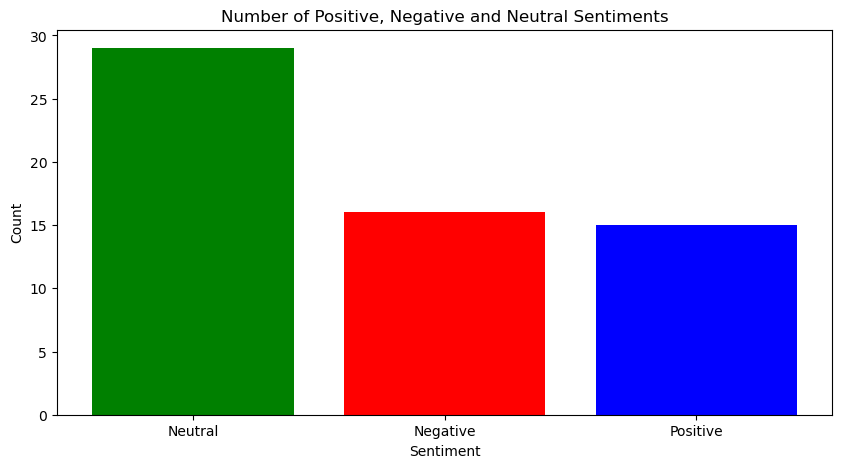

In [15]:
# Bar Chart of Sentiment Counts
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title('Number of Positive, Negative and Neutral Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

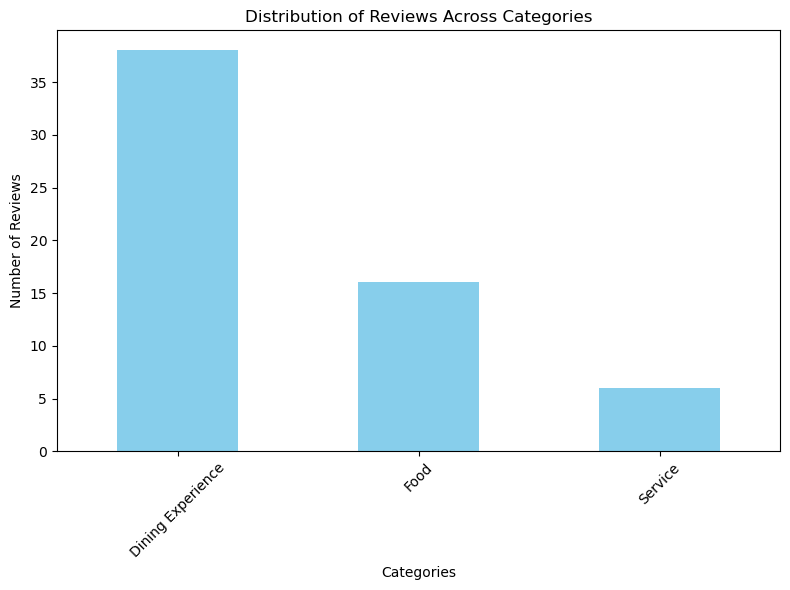

In [17]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews Across Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
all_topics = [topic for topics in df['Topics'].str.split(', ') for topic in topics]
topic_counts = Counter(all_topics)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_counts)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Topics')
plt.show()

NameError: name 'Counter' is not defined